# Covid-19 Analysis

## Introduction

COVID-19 is an infectious disease caused by the Coronavirus, biologically known as severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in Wuhan, the capital of China’s Hubei province in December 2019 and has spread all over the world since then. 

We attempt to look at its spread in Bangalore and attempt to determine if demographic factors like age and gender play a role in this infection. We also attempt to analyse the effect of ambient temperature on the spread of this infection.

## Questions
1. Is there any relationship between gender and being infected?
2. Is there any relationship between gender and death from infection?
3. Is there any relationship between age and being infected?
4. Is there any relationship between age and death from infection?
5. Is there any relationship between number of infections and temperature?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

alpha = 0.05

### Relationship between gender and being infected

In [2]:
dp = pd.read_csv("./dataset/census_data_blr.csv")
pop_m = dp["Males"].sum()
pop_f = dp["Females"].sum()

dc = pd.read_csv("./dataset/covid_data.csv")
dx = dc[dc["Detected District"].isin(["Bengaluru Urban", "Bengaluru Rural"])]
sam_m = dx[dx["Gender"]=="Male"]["Gender"].count()
sam_f = dx[dx["Gender"]=="Female"]["Gender"].count()

df = pd.DataFrame({"Gender": ["Male","Female"],
                   "Population": [pop_m, pop_f], 
                   "Infections": [sam_m, sam_f]})
df = df.set_index("Gender")
df

,Population,Infections
Gender,,
Male,5013383,23907
Female,4591090,14103


(-1, 2)

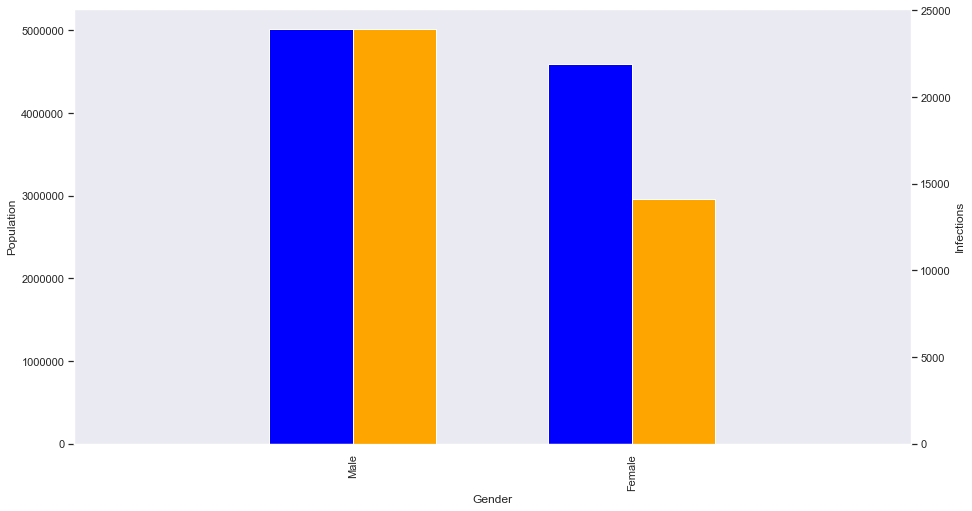

In [3]:
sns.set()

fig = plt.figure(figsize=(15,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = 0.3

df["Population"].plot(kind='bar',color='blue',ax=ax,width=width,position=1)
df["Infections"].plot(kind='bar',color='orange', ax=ax2,width = width,position=0)

ax.grid(None)
ax2.grid(None)

ax.set_ylabel("Population")
ax2.set_ylabel("Infections")

ax.set_xlim(-1,2)

In [4]:
contingency = [[pop_m,sam_m],[pop_f,sam_f]]
contingency

[[5013383, 23907], [4591090, 14103]]

In [5]:
print("Our Null-Hypothesis is that the number of infections is not dependent on gender.")
stat, p, dof, expected = chi2_contingency(contingency)
if p <= alpha: #reject H0
    print(f"Since p-Value {round(p,2)} is less than our alpha ({alpha}), we fail to accept our Null-Hypothesis.")
    print("Thus it appears that gender does have an effect on number of infections.")
else:
    print(f"Since p-Value {round(p,2)} is greater than our alpha ({alpha}), we accept our Null-Hypothesis.")
    print("Thus it appears that gender does not have an effect on number of infections.")

Our Null-Hypothesis is that the number of infections is not dependent on gender.
Since p-Value 0.0 is less than our alpha (0.05), we fail to accept our Null-Hypothesis.
Thus it appears that gender does have an effect on number of infections.


### Relationship between gender and death from infection

In [6]:
dc = pd.read_csv("./dataset/covid_data.csv")
dx = dc[dc["Detected District"].isin(["Bengaluru Urban", "Bengaluru Rural"])]
pop_m = dx[dx["Gender"]=="Male"]["Gender"].count()
pop_f = dx[dx["Gender"]=="Female"]["Gender"].count()

dx = dx[dx["Current Status"] == "Deceased"]
sam_m = dx[dx["Gender"]=="Male"]["Gender"].count()
sam_f = dx[dx["Gender"]=="Female"]["Gender"].count()

df = pd.DataFrame({"Gender": ["Male","Female"],
                   "Infections": [pop_m, pop_f], 
                   "Deaths": [sam_m, sam_f]})
df = df.set_index("Gender")
df

,Infections,Deaths
Gender,,
Male,23907,1430
Female,14103,703


(-1, 2)

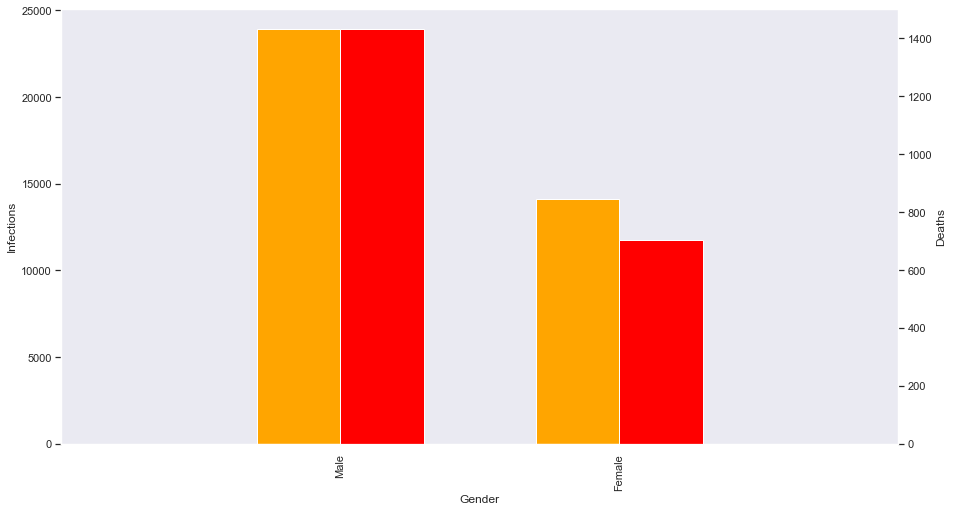

In [7]:
sns.set()

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = 0.3

df["Infections"].plot(kind='bar',color='orange',ax=ax,width=width,position=1)
df["Deaths"].plot(kind='bar',color='red', ax=ax2,width = width,position=0)

ax.grid(None)
ax2.grid(None)

ax.set_ylabel("Infections")
ax2.set_ylabel("Deaths")

ax.set_xlim(-1,2)

In [8]:
contingency = [[pop_m,sam_m],[pop_f,sam_f]]
contingency

[[23907, 1430], [14103, 703]]

In [9]:
print("Our Null-Hypothesis is that the number of deaths (post infection) is not dependent on gender.")
stat, p, dof, expected = chi2_contingency(contingency)
if p <= alpha: #reject H0
    print(f"Since p-Value {round(p,2)} is less than our alpha ({alpha}), we fail to accept our Null-Hypothesis.")
    print("Thus it appears that gender does have an effect on number of deaths (post infection).")
else:
    print(f"Since p-Value {round(p,2)} is greater than our alpha ({alpha}), we accept our Null-Hypothesis.")
    print("Thus it appears that gender does not have an effect on number of deaths (post infection).")

Our Null-Hypothesis is that the number of deaths (post infection) is not dependent on gender.
Since p-Value 0.0 is less than our alpha (0.05), we fail to accept our Null-Hypothesis.
Thus it appears that gender does have an effect on number of deaths (post infection).


### Relationship between age and being infected

In [10]:
dp = pd.read_csv("./dataset/census_data_blr.csv")
dp = dp[dp["Age Group"].notna()]
dp.rename(columns = {'Persons':'Population'}, inplace = True)
dp = dp.groupby(by="Age Group").sum()["Population"].to_frame()

dc = pd.read_csv("./dataset/covid_data.csv")
dx = dc[dc["Detected District"].isin(["Bengaluru Urban", "Bengaluru Rural"])]
dx = dx[dx["Age Group"].notna()]
dx["Infections"] = np.zeros(len(dx))
dx = dx.groupby(by="Age Group").count()["Infections"].to_frame()
dx
df = pd.concat([dp, dx], axis=1)
df = df[df["Population"].notna()]
df

,Population,Infections
000-009,1478287.0,286
010-019,1503635.0,670
020-029,2293744.0,2726
030-039,1785664.0,4482
040-049,1123911.0,4807
050-059,701617.0,3355
060-069,449854.0,3481
070-079,185958.0,1374
080-089,65566.0,680
090-099,16237.0,103


(-1, 10)

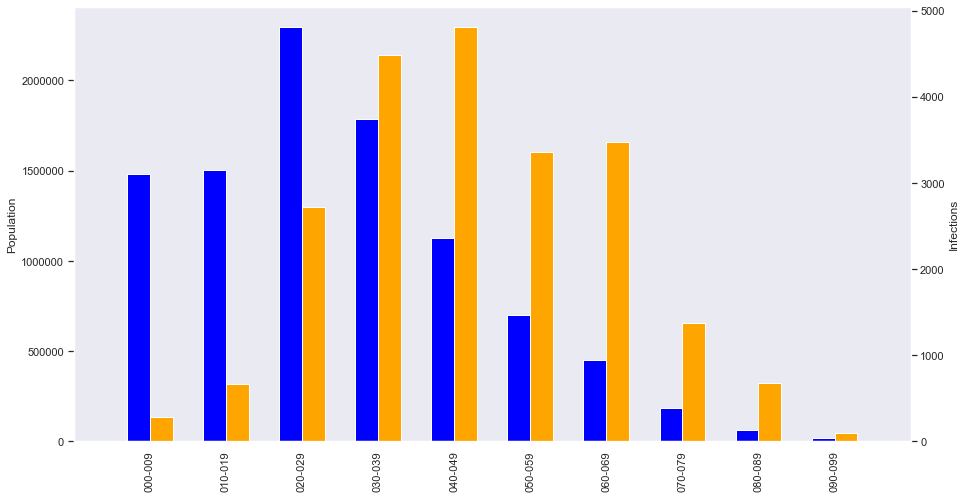

In [11]:
sns.set()

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = 0.3

df["Population"].plot(kind='bar',color='blue',ax=ax,width=width,position=1)
df["Infections"].plot(kind='bar',color='orange', ax=ax2,width = width,position=0)

ax.grid(None)
ax2.grid(None)

ax.set_ylabel("Population")
ax2.set_ylabel("Infections")

ax.set_xlim(-1,10)

In [12]:
contingency = [[row["Population"],row["Infections"]] for index, row in df.iterrows()]
contingency

[[1478287.0, 286.0],
 [1503635.0, 670.0],
 [2293744.0, 2726.0],
 [1785664.0, 4482.0],
 [1123911.0, 4807.0],
 [701617.0, 3355.0],
 [449854.0, 3481.0],
 [185958.0, 1374.0],
 [65566.0, 680.0],
 [16237.0, 103.0]]

In [13]:
print("Our Null-Hypothesis is that the number of infections is not dependent on age.")
stat, p, dof, expected = chi2_contingency(contingency)
if p <= alpha: #reject H0
    print(f"Since p-Value {round(p,2)} is less than our alpha ({alpha}), we fail to accept our Null-Hypothesis.")
    print("Thus it appears that age does have an effect on number of infections.")
else:
    print(f"Since p-Value {round(p,2)} is greater than our alpha ({alpha}), we accept our Null-Hypothesis.")
    print("Thus it appears that age does not have an effect on number of infections.")

Our Null-Hypothesis is that the number of infections is not dependent on age.
Since p-Value 0.0 is less than our alpha (0.05), we fail to accept our Null-Hypothesis.
Thus it appears that age does have an effect on number of infections.


### Relationship between age and death from infection

In [14]:
dc = pd.read_csv("./dataset/covid_data.csv")
dc = dc[dc["Detected District"].isin(["Bengaluru Urban", "Bengaluru Rural"])]
dx = dc[dc["Age Group"].notna()]
dx["Infections"] = np.zeros(len(dx))
dx = dx.groupby(by="Age Group").count()["Infections"].to_frame()

dy = dc[dc["Age Group"].notna()]
dy = dy[dy["Current Status"] == "Deceased"]
dy["Deaths"] = np.zeros(len(dy))
dy = dy.groupby(by="Age Group").count()["Deaths"].to_frame()

df = pd.concat([dx, dy], axis=1)
df["Deaths"] = df["Deaths"].fillna(0)
df

,Infections,Deaths
000-009,286,0.0
010-019,670,3.0
020-029,2726,18.0
030-039,4482,34.0
040-049,4807,137.0
050-059,3355,212.0
060-069,3481,414.0
070-079,1374,261.0
080-089,680,176.0
090-099,103,30.0


(-1, 11)

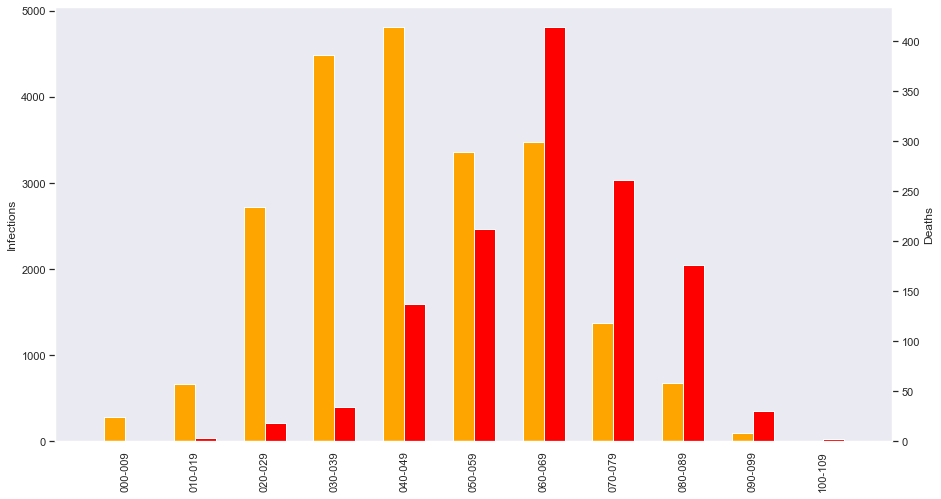

In [15]:
sns.set()

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = 0.3

df["Infections"].plot(kind='bar',color='orange',ax=ax,width=width,position=1)
df["Deaths"].plot(kind='bar',color='red', ax=ax2,width = width,position=0)

ax.grid(None)
ax2.grid(None)

ax.set_ylabel("Infections")
ax2.set_ylabel("Deaths")

ax.set_xlim(-1,11)

In [16]:
contingency = [[row["Infections"],row["Deaths"]] for index, row in df.iterrows()]
contingency

[[286.0, 0.0],
 [670.0, 3.0],
 [2726.0, 18.0],
 [4482.0, 34.0],
 [4807.0, 137.0],
 [3355.0, 212.0],
 [3481.0, 414.0],
 [1374.0, 261.0],
 [680.0, 176.0],
 [103.0, 30.0],
 [8.0, 2.0]]

In [17]:
print("Our Null-Hypothesis is that the number of deaths (post infection) is not dependent on age.")
stat, p, dof, expected = chi2_contingency(contingency)
if p <= alpha: #reject H0
    print(f"Since p-Value {round(p,2)} is less than our alpha ({alpha}), we fail to accept our Null-Hypothesis.")
    print("Thus it appears that age does have an effect on number of deaths (post infection).")
else:
    print(f"Since p-Value {round(p,2)} is greater than our alpha ({alpha}), we accept our Null-Hypothesis.")
    print("Thus it appears that age does not have an effect on number of deaths (post infection).")

Our Null-Hypothesis is that the number of deaths (post infection) is not dependent on age.
Since p-Value 0.0 is less than our alpha (0.05), we fail to accept our Null-Hypothesis.
Thus it appears that age does have an effect on number of deaths (post infection).


### Relationship between number of infections and temperature

Most analysis has been on the infection after 5-15 days, we decide to look at a longer duration.

In [18]:
dw = pd.read_excel("./dataset/weather_data_blr.xlsx")
dw = dw[["D_26", "Temp Avg"]]
dw["Date"] = dw["D_26"].astype(str)
dw.set_index("Date", inplace=True)

dc = pd.read_csv("./dataset/covid_data.csv")
dx = dc[dc["Detected District"].isin(["Bengaluru Urban", "Bengaluru Rural"]) 
        & dc["Gender"].isna() & dc["Age Group"].isna()
        & (dc["Current Status"] == "Hospitalized") & (dc["Date"] >= "2020-08-01")]
dx = dx.groupby(by="Date").sum()["Num Cases"].to_frame()

df = pd.concat([dw, dx], axis=1)
df.dropna(inplace=True)
df

,D_26,Temp Avg,Num Cases
2020-08-01,2020-08-01,23.6,1945.0
2020-08-02,2020-08-02,23.7,2143.0
2020-08-03,2020-08-03,23.5,1499.0
2020-08-04,2020-08-04,23.4,2117.0
2020-08-05,2020-08-05,23.8,1958.0
...,...,...,...
2021-04-03,2021-04-03,24.1,3056.0
2021-04-04,2021-04-04,23.3,2942.0
2021-04-05,2021-04-05,25.0,3762.0
2021-04-06,2021-04-06,25.2,4346.0


Text(0, 0.5, 'Number of Infections')

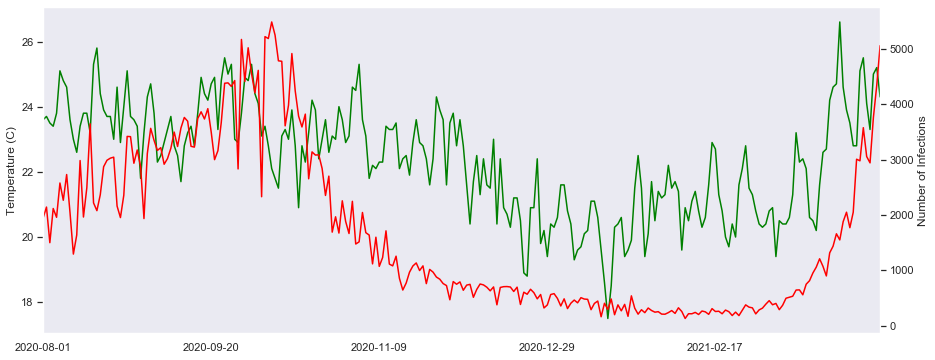

In [19]:
sns.set()

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = 0.3

df["Temp Avg"].plot(kind='line',color='green',ax=ax)#,width=width,position=1)
df["Num Cases"].plot(kind='line',color='red', ax=ax2)#,width = width,position=0)

ax.grid(None)
ax2.grid(None)

ax.set_ylabel("Temperature (C)")
ax2.set_ylabel("Number of Infections")

In [20]:
from scipy.stats import pearsonr, spearmanr

#print(df[df.columns[-2:]].corr())

corr, _ = pearsonr(df["Temp Avg"], df["Num Cases"])
print('Pearsons correlation: %.3f' % corr)

corr, _ = spearmanr(df["Temp Avg"], df["Num Cases"])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.650
Spearmans correlation: 0.735


There seems to be a positive correlation between temperature on day (d) and infections (on d+26). Though we are not sure if we can generalize this, and we definitely do not know what is causing this. Perhaps, we should look at a larger data set. 

## Limitations
1. Limited to Data from Bangalore. It would be interesting to see if the same conclusions can be drawn from a larger data set
2. Demographic details of individuals are provided regularly only till end of May 2020, sporadically till end of July 2020 and then none at all. Thus the demographic analysis is limited to patients who were infect earlier in the pandemic. We do not know if the demographic conclusions still stand.

## Ideas for Future
1. State or National level demographic analysis.
2. Analyse impact of temperature for other cities
3. Analyse the impact of temperature on newer variants of the virus that can be seen infecting people from March 2021 onward

## References
1. Covid-19 Infection Data from [Covid19India](https://github.com/covid19india/api)
2. Temperature Data from [Weather Underground](https://www.wunderground.com/history/monthly/in/devanahalli/VOBL)
3. India Census Data 2011 by [State/District](https://censusindia.gov.in/2011census/C-series/C-13.html)